## Pharmaceutical Market & Product Portfolio Analysis

#### This project analyzes pharmaceutical drug data across multiple medicine systems Allopathic, Ayurvedic, Herbal, Homeopathic, and Unani to understand market dominance, manufacturer portfolios, and regulatory distribution.

#### The focus of this project is **Product and market structure analytics**, 



### Data Source & Objective

##### The datasets used in this project were sourced from Kaggle, an open-source data platform,and are used strictly for analytical and educational purposes.

#### Objectives:
##### - Integrate multiple pharmaceutical datasets from different medicine systems
##### - Clean and standardize data for analytics readiness
##### - Create a unified schema suitable for SQL modeling and BI dashboards
##### - Analyze market dominance and manufacturer portfolio strength


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
Allopathy = pd.read_csv(r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Raw csv\AllopathicDrugDatabase.csv")

Ayurvedic = pd.read_csv(r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Raw csv\Ayurvedic_Drug_Database.csv")

Herbal = pd.read_csv(r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Raw csv\Herbal_Drug_Database.csv")

Homeopathic = pd.read_csv( r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Raw csv\Homeopathic_Drug_Database.csv",
    encoding="latin1")

Unani = pd.read_csv( r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Raw csv\Unani_Drug_Database.csv",
    encoding="latin1")

## Dataset Overview

#### The project uses five separate datasets, each representing a different medicine system within the pharmaceutical industry:

#### - Allopathic
#### - Ayurvedic
#### - Herbal
#### - Homeopathic
#### - Unani

#### Each dataset contains product-level information such as manufacturer name, brand name, dosage form, generic composition, regulatory approval code (DAR), and medicine system classification.


In [3]:
Dataset = {
    "Allopathic": Allopathy,
    "Ayurvedic": Ayurvedic,
    "Herbal": Herbal,
    "Homeopathic": Homeopathic,
    "Unani": Unani
}

In [4]:
# Check for dataset name and shape
for name , df in Dataset.items():
    print(f"\n {name}")
    print("Shapes:", df.shape)


 Allopathic
Shapes: (36254, 8)

 Ayurvedic
Shapes: (5262, 6)

 Herbal
Shapes: (1028, 6)

 Homeopathic
Shapes: (2580, 6)

 Unani
Shapes: (8460, 6)


In [5]:
#Check for dataset info

for name, df in Dataset.items():
    print(f"\n{name} Dataset Info")
    df.info()


Allopathic Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36254 entries, 0 to 36253
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   #SL                       36254 non-null  int64 
 1   Name of the Manufacturer  36254 non-null  object
 2   Brand Name                36251 non-null  object
 3   Generic Name              36254 non-null  object
 4   Strength                  36254 non-null  object
 5   Dosages Description       36254 non-null  object
 6   Use For                   36254 non-null  object
 7   DAR                       36254 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB

Ayurvedic Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5262 entries, 0 to 5261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   SL                         5262 

In [6]:
#Check for missing values

for name, df in Dataset.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())


Missing values in Allopathic:
#SL                         0
Name of the Manufacturer    0
Brand Name                  3
Generic Name                0
Strength                    0
Dosages Description         0
Use For                     0
DAR                         0
dtype: int64

Missing values in Ayurvedic:
SL                           0
Name of the Manufacturer     0
Brand Name                   0
Dosages Description          0
Generic Name and Strength    0
DAR                          0
dtype: int64

Missing values in Herbal:
SL                           0
Name of the Manufacturer     0
Brand Name                   0
Dosages Description          0
Generic Name and Strength    0
DAR                          0
dtype: int64

Missing values in Homeopathic:
SL                           0
Name of the Manufacturer     0
Brand Name                   0
Dosages Description          0
Generic Name and Strength    0
DAR                          0
dtype: int64

Missing values in Unani:
SL  

##### The datasets show high completeness with some missing values. There were only 3 missing brand names were observed in the Allopathic dataset, while all other datasets had complete records.

### Data Cleaning & Standardization

##### To ensure consistency across multiple datasets, data cleaning was performed using Python. 
##### Key steps included standardizing manufacturer names, aligning column structures, handling missing values, and ensuring schema compatibility across all medicine systems.


In [7]:
# Remove unwanted spaces,underscore and hyphens and converting to lower case

for df in Dataset.values():
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )

In [8]:
# Fill null values in Allopathy dataset in column brand_name
Allopathy["brand_name"].fillna("Unknown Brand", inplace=True)

In [9]:
#False values present in homeopathy and ayurveda table 
# False doesn't make sence 
# Replace it with Not Specified

for df in [Ayurvedic, Homeopathic]:
    df['generic_name_and_strength'] = (
        df['generic_name_and_strength']
        .replace('FALSE', 'Not Specified')
    )

In [10]:
# To Recheck we print values
print(Ayurvedic['generic_name_and_strength'].value_counts())

print("\nHomeopathic:")
print(Homeopathic['generic_name_and_strength'].value_counts().head())


Ayurvedic:
generic_name_and_strength
Chandanasav                133
Balarista                  127
Ashokarista                118
Vasakarista / Vasakasav    118
Mustakarista               113
Name: count, dtype: int64

Homeopathic:
generic_name_and_strength
Not Specified          1593
Kali Phosphoricum        24
Natrum Sulphuricum       23
Natrum Phosphoricum      22
Natrum Muriaticum        21
Name: count, dtype: int64


In [11]:
# Add medicine_system column according to their dataset to ensure consistency

Allopathy["medicine_system"] = "Allopathic"
Ayurvedic["medicine_system"] = "Ayurvedic"
Herbal["medicine_system"] = "Herbal"
Homeopathic["medicine_system"] = "Homeopathic"
Unani["medicine_system"] = "Unani"


In [12]:
# Converts all manufracturer names to upper cases 
def clean_manufacturer(col):
    return col.str.upper().str.strip()

for df in Dataset.values():
    df["name_of_the_manufacturer"] = clean_manufacturer(
        df["name_of_the_manufacturer"]
    )

In [13]:
# Check for all columns 
for name, df in Dataset.items():
    print(f"\n{name} columns:")
    print(df.columns)


Allopathic columns:
Index(['#sl', 'name_of_the_manufacturer', 'brand_name', 'generic_name',
       'strength', 'dosages_description', 'use_for', 'dar', 'medicine_system'],
      dtype='object')

Ayurvedic columns:
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')

Herbal columns:
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')

Homeopathic columns:
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')

Unani columns:
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')


In [14]:
# Rename column to ensure consistency
Allopathy.rename(columns={"#sl": "sl"}, inplace=True)

In [15]:
# Join generic name and strength column in allopathy database to ensure consistency  
Allopathy["generic_name_and_strength"] = (
    Allopathy["generic_name"].astype(str).str.strip() + " " +
    Allopathy["strength"].astype(str).str.strip()
)

In [16]:
# Drop generic name and strength seperate columns 
Allopathy.drop(columns=["generic_name", "strength"], inplace=True)

In [17]:
# To check for consistent database 
print(Allopathy.columns)
print(Ayurvedic.columns)
print(Herbal.columns)
print(Homeopathic.columns)
print(Unani.columns)

Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'use_for', 'dar', 'medicine_system', 'generic_name_and_strength'],
      dtype='object')
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')
Index(['sl', 'name_of_the_manufacturer', 'brand_name', 'dosages_description',
       'generic_name_and_strength', 'dar', 'medicine_system'],
      dtype='object')


In [18]:
# Drop s1 as it only contains index

for df in Dataset.values():
    if "sl" in df.columns:
        df.drop(columns=["sl"], inplace=True)


In [19]:
# To design schema we add one column
for df in [Ayurvedic, Herbal, Homeopathic, Unani]:
    df["use_for"] = "Not Specified"

In [20]:
final_columns = [
    "name_of_the_manufacturer",
    "brand_name",
    "generic_name_and_strength",
    "dosages_description",
    "use_for",
    "dar",
    "medicine_system"
]

for key in Dataset:
    Dataset[key] = Dataset[key][final_columns]

### Final Unified Schema

#### After cleaning and alignment, all datasets share the following structure:

##### - name_of_the_manufacturer
##### - brand_name
##### - generic_name_and_strength
##### - dosages_description
##### - use_for
##### - dar
##### - medicine_system

#### This unified schema is now ready for SQL-based modeling and BI analysis.

In [21]:
for name, df in Dataset.items():
    print(name)
    print(df.columns)
    print("-" * 40)


Allopathic
Index(['name_of_the_manufacturer', 'brand_name', 'generic_name_and_strength',
       'dosages_description', 'use_for', 'dar', 'medicine_system'],
      dtype='object')
----------------------------------------
Ayurvedic
Index(['name_of_the_manufacturer', 'brand_name', 'generic_name_and_strength',
       'dosages_description', 'use_for', 'dar', 'medicine_system'],
      dtype='object')
----------------------------------------
Herbal
Index(['name_of_the_manufacturer', 'brand_name', 'generic_name_and_strength',
       'dosages_description', 'use_for', 'dar', 'medicine_system'],
      dtype='object')
----------------------------------------
Homeopathic
Index(['name_of_the_manufacturer', 'brand_name', 'generic_name_and_strength',
       'dosages_description', 'use_for', 'dar', 'medicine_system'],
      dtype='object')
----------------------------------------
Unani
Index(['name_of_the_manufacturer', 'brand_name', 'generic_name_and_strength',
       'dosages_description', 'use_for',

In [24]:
# # Export clean data into csv file

# Allopathy.to_csv(
#     r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Clean_Dataset\Allopathy_clean.csv",
#     index=False
# )
# Ayurvedic.to_csv(
#     r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Clean_Dataset\Ayurveda_clean.csv",
#     index=False
# )
# Herbal.to_csv(
#     r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Clean_Dataset\Herbal_clean.csv",
#     index=False
# )
# Homeopathic.to_csv(
#     r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Clean_Dataset\Homeopathy_clean.csv",
#     index=False
# )
# Unani.to_csv(
#     r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Clean_Dataset\Unani_clean.csv",
#     index=False
# )


#### SQL Data Modeling

##### After cleaning, the data was modeled using a star schema using MySQL. 
##### Dimension tables were created for key categorical entities, and a central fact table was designed to store product-level records, enabling scalable and efficient analytical queries.


In [60]:
# # Import fact table from sql 
# import mysql.connector

# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     password="root",
#     database="pharma_analytics"
# )

# df = pd.read_sql("SELECT * FROM Fact_Drugs", conn)
# df.to_csv("Fact_Drugs.csv", index=False)


#### Key Insights (Preliminary – Derived from SQL)

##### - Allopathic medicines dominate the market based on product count.
##### - A small number of manufacturers contribute a large proportion of total products.
##### - Tablet, capsule, and liquid forms are the most commonly used dosage types across medicine systems.


In [29]:
df = pd.read_csv(r"C:\Users\sayal\OneDrive\Desktop\Projects\pharma\Fact_Drugs.csv")

In [30]:
df.shape

(53584, 8)

In [31]:
df.head()

,drug_id,manufacturer_id,medicine_system_id,brand_name,generic_name_and_strength,dosages_description,use_for,dar
0,1,1,1,Zeocin 500,Azithromycin 500 mg,Tablet,Human,135--023
1,2,2,1,Benzyl Lotion 25%,Benzyl Benzoate 1.25 gm/5 ml,Lotion,Human,036-0520-071
2,3,3,1,Bendil,Diphenhydramine Hydrochloride + Zinc Acetate 2...,Cream,Human,272-0202-071
3,4,3,1,Tixol,Flupenthixol + Melitracen 500 mcg + 10 mg,Tablet,Human,272--028
4,5,4,1,Turbocef,Cefuroxime 250 mg/5 ml,Powder For Suspension,Human,186-0549-023


In [33]:
#Check for null values
df.isnull().sum()

drug_id                      0
manufacturer_id              0
medicine_system_id           0
brand_name                   0
generic_name_and_strength    0
dosages_description          0
use_for                      0
dar                          0
dtype: int64

In [34]:
#Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [35]:
#Count values for all dataset 
df['medicine_system_id'].value_counts()

medicine_system_id
1    36254
5     8460
2     5262
4     2580
3     1028
Name: count, dtype: int64

In [36]:
df['manufacturer_id'].value_counts().head(10)

manufacturer_id
144    1357
16     1280
25     1236
32     1065
2      1053
4      1016
21      869
8       736
35      725
19      722
Name: count, dtype: int64

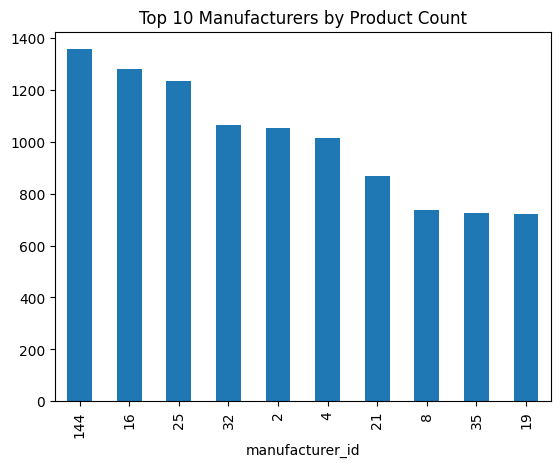

In [37]:
#Top 10 manufracturer by product count 

df['manufacturer_id'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Manufacturers by Product Count")
#plt.legend()
plt.show()

In [38]:
#Top 10 dosage
df['dosages_description'].value_counts().head(10)

dosages_description
Tablet                   20031
Capsule                   7794
Liquid                    7765
Injection                 3052
Syrup                     1942
Powder For Suspension     1478
Eye Drops                 1168
Powder                    1061
Suspension                 951
Cream                      824
Name: count, dtype: int64

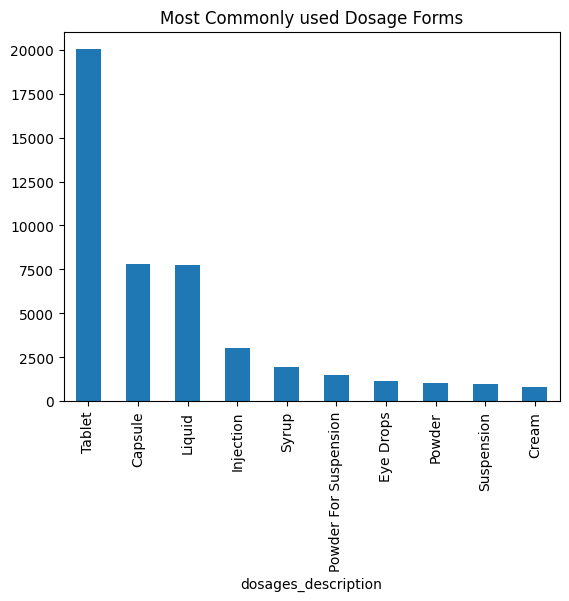

In [39]:
df['dosages_description'].value_counts().head(10).plot(kind='bar')
plt.title("Most Commonly used Dosage Forms")
plt.show()

In [40]:
#To check brand diversity
top_brands = (
    df.groupby('manufacturer_id')['brand_name']
      .nunique()
      .sort_values(ascending=False)
      .head(10)
)
top_brands

manufacturer_id
144    1242
16     1165
25     1098
2       960
32      959
4       934
21      826
8       685
19      667
35      667
Name: brand_name, dtype: int64

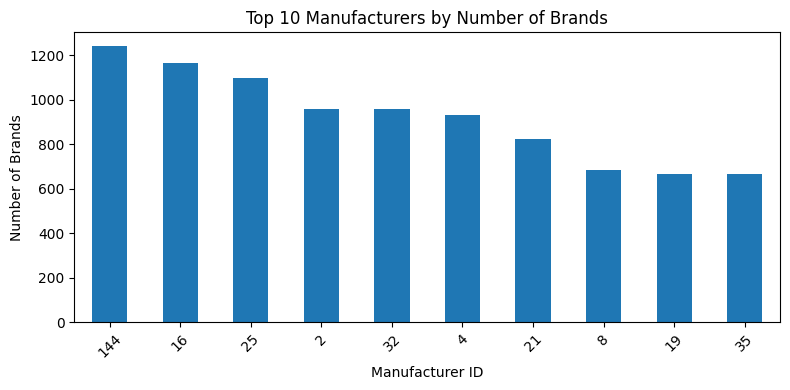

In [41]:
plt.figure(figsize=(8, 4))
top_brands.plot(kind='bar')
plt.title("Top 10 Manufacturers by Number of Brands")
plt.xlabel("Manufacturer ID")
plt.ylabel("Number of Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
use_for_counts = df['use_for'].value_counts()
use_for_counts

#The value 'R' was retained to avoid incorrect assumptions, as its meaning is system-dependent and domain-specific.

use_for
Human            34175
Not Specified    17330
Veterinary        2038
R                   41
Name: count, dtype: int64

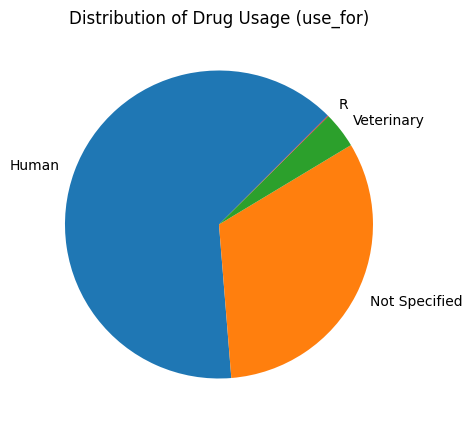

In [57]:
# Plot to see count of use_for
plt.figure(figsize=(5,5))
plt.pie(
    use_for_counts,
    labels=use_for_counts.index,
    # autopct='%1.1f%%',
    startangle=45
)
plt.title('Distribution of Drug Usage (use_for)')
plt.show()

### CONCLUSION

#### Exploratory data analysis confirmed strong dominance of allopathic medicines in the dataset, indicating higher product availability compared to other medicine systems. Manufacturer-level analysis revealed a skewed distribution, where a small number of manufacturers contribute a significant share of total products, while most manufacturers maintain limited portfolios. Dosage form analysis highlighted tablets, capsules, and liquid formulations as the most prevalent forms across medicine systems, reflecting common pharmaceutical delivery preferences. Overall, the EDA validated the SQL-based insights and provided a clear understanding of product distribution and market structure, forming a reliable foundation for dashboarding and further analytical exploration.

In [58]:
# SPECIFY MEDININE SYSTEM AND MEDICINE ID 